# Regression PLots

[Resource](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

plt.rc('figure', figsize=(16, 8))
plt.rc('font', size=14)

# Duncan's Prestige Dataset

## Load the Data

We can use a utility function to load any R dataset available from the Rdatasets package.

In [6]:
prestige = sm.datasets.get_rdataset('Duncan', 'carData', cache=True).data
prestige.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [8]:
prestige_model = ols('prestige ~ income + education', data=prestige).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           8.65e-17
Time:                        10:02:41   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

## Influence plots

Influence plots show the (externally) studentized residuals vs.the leverage of each observation as measured by the hat matrix.

See [this resource](https://online.stat.psu.edu/stat462/node/247/) for more on studentized residuals.

Externally studentized residuals are residuals that are scaled by their standard deviation. The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

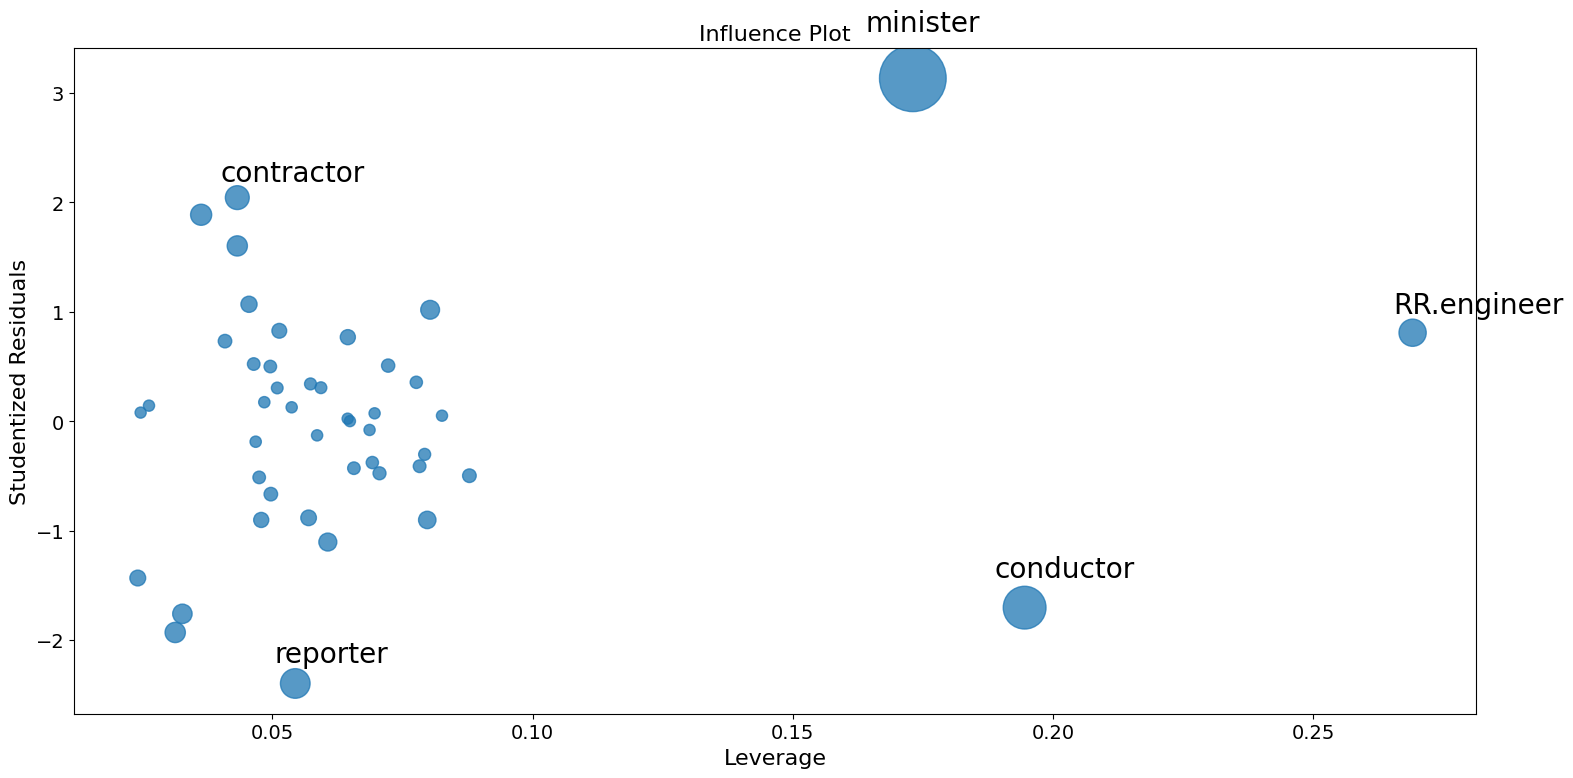

In [9]:
fig = sm.graphics.influence_plot(prestige_model, criterion='cooks')
fig.tight_layout(pad=1.0)

As you can see there are a few worrisome observations. Both contractor and reporter have low leverage but a large residual. RR.engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and, therefore, large influence.

## Partial Regression Plots (Duncan)

Since we're doing multivariate regressions, we can't just look at individual bivariate plots to discern relationships. Instead, we want to look at the relationship of the dependent variable and the independent variables conditional on the other independent variables. We can do this through using partial regression plots, otherwise known as added variable plots.

In a partial regression plot, to discern the relationship between the response variable and th k-th variable, we compute the residuals by regressing the response variable versus the independent variables excluding <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mi>k</mi>
  </msub>
</math>. We can denote this by <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x223C;</mo>
      <mi>k</mi>
    </mrow>
  </msub>
</math>. We then compute the residuals by regressing <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mi>k</mi>
  </msub>
</math> on <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x223C;</mo>
      <mi>k</mi>
    </mrow>
  </msub>
</math>. The partial regression plot is the plot of the former versus the latter residuals.

The notable points of this plot are that the fitted line has slope <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3B2;</mi>
    <mi>k</mi>
  </msub>
</math> and intercept zero. The residuals of this plot are the same as those of the least squares fit of the original model with full *X*. You can discern the effects of the individual data values on the estimations of a coefficient easily. If `obs_labels` is `Trye`, then these points are annotated with their observation label. You can also see the violation of underlying assumptions such as homoskedasticity and linearity.

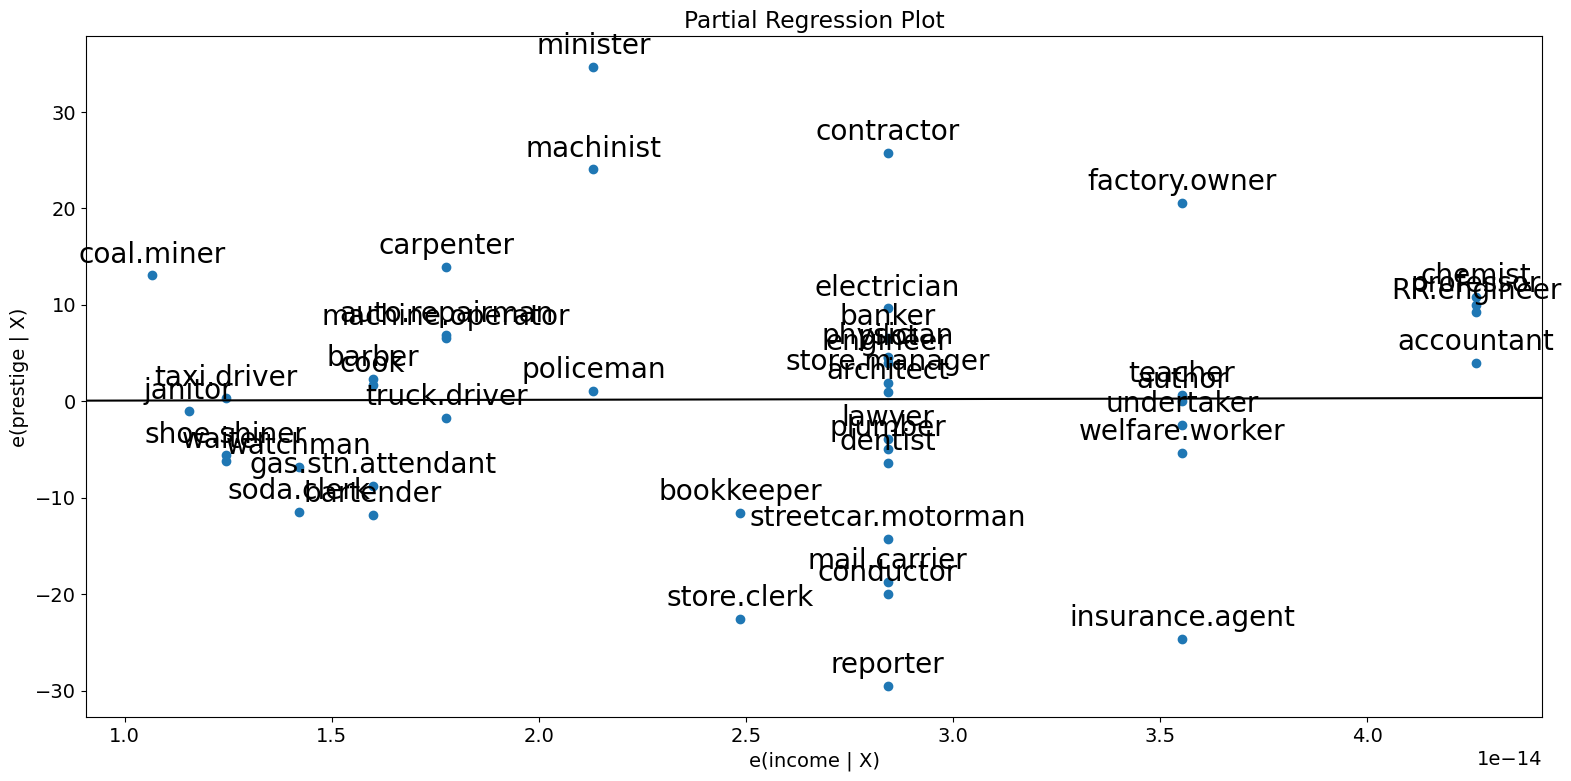

In [10]:
fig = sm.graphics.plot_partregress(
    'prestige', 'income', ['income', 'education'], data=prestige
)
fig.tight_layout(pad=1.0)